<a href="https://colab.research.google.com/github/gitavellas/-Google-Maps-Tutorial-callback-PHP/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
#look at data types 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

In [ ]:
#Get the shape of the array
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


In [ ]:
#take a look at the first image as an array
index = 0
x_train[index]

In [ ]:
#show image as a picture
img = plt.imshow(x_train[index])

In [ ]:
#get the image label
print('The Image label is:', y_train[index])

In [ ]:
#Get the image clasification
classification = ['airplane', 'autombile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print kelas classification
print('The Image Class is:', classification[y_train[index][0]])

In [ ]:
#convert the labels into a set of 10 numbers to input into the CNN
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Print the new labels
print(y_test_one_hot)

In [ ]:
#Print label baru dari gambar
print('The one hot label is:', y_train_one_hot[index])

In [ ]:
#Normalize Pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

In [ ]:
#Membuat model arsitektur
model = Sequential()

#add layer
model.add( Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))

#add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolutional layer
model.add( Conv2D(32, (5,5), activation='relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add a flattening layer
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])


In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                  batch_size = 256,
                  epochs = 10,
                  validation_split = 0.2)

In [ ]:
#evaluation The model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]


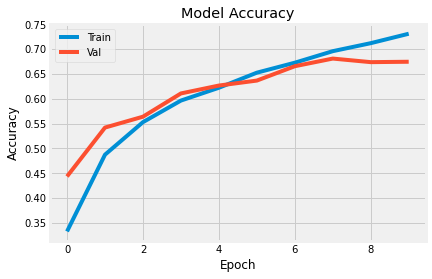

In [ ]:
#visualisasi the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

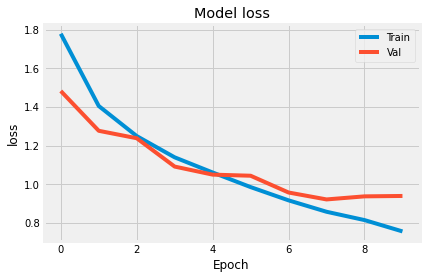

In [ ]:
#Visualisasi the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
#Test The model with an example
from google.colab import files
uploaded = files.upload()


In [ ]:
#Show the image
new_image = plt.imread('cat1.jpg')
img = plt.imshow(new_image)

In [ ]:
#Resize the image
from skimage.transform import  resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#Get the models prediction
predictions = model.predict(np.array([resized_image]))
#Show the prediction
predictions

In [ ]:
#Sort the prediction from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

      #Show the sorted labels in order
      print(list_index)

In [ ]:
#Print the first  5 prediction
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100), 2, '%')
